# Data Analytics Project
- ---------------------------------------------------------------------------------------------------
A telecommunications services provider has requested a comprehensive analysis of the behavior of the sector at the national level. The analysis should cover not only internet access, which is the company's main activity, but also the general behavior of communication services. The objective of the analysis is to guide the company in improving the quality of its services, identifying growth opportunities, and offering personalized solutions to its potential customers.
- ---------------------------------------------------------------------------------------------------
### Index:

    A. Load & Organize  ........................................................................................................ Chapter A
        - Merge # 1
        - Merge # 2
    B. Exploratory Data Analysis [EDA]  ........................................................................................ Chapter B
        - Phase # 1
        - Phase # 2
    C. Export Data  ............................................................................................................ Chapter C

- ---------------------------------------------------------------------------------------------------------
# Load & Organize - Chapter A

I uploaded the 16 data sets to python...

* Merge # 1 - I opened them and found some similarities between the ones that have "provincia" in them. First, they had the same number of rows. Second, they have the same first 3 columns [year, trimester, and provincia]. Finally, I believe that joining them together in order to form more columns but, in one table will be useful for better understanding the dataset.



* Merge # 2 - I found other dataSets that share similarities therefore, I will be joining them together as one dataFrame. In this specific case, they have the same number of rows [35] and share the first and second column [Año and Trimestre]. I also believe that merging theme will improve my analysis in the near future.



### Merge # 1:

Every merge has its problems at the beginning. In this part I encounter some of them:

- DataSets with repeated names so, I changed some names. I made them more specific.
- Columns with different data types so, I changed the data types of some columns.

After those two, I did started the merge. After the merge, I did encounter some other problems. Keep reading, since I have the solutions as well.

In [1]:
import pandas as pd

# LOAD - Loading data sets
Acceso_Internet_Banda_Provincia = pd.read_csv("dataSets/Acceso_Internet_Banda_Provincia.csv")
Acceso_Internet_Rangos_Velocidad_Provincia = pd.read_csv("dataSets/Acceso_Internet_Rangos_Velocidad_Provincia.csv")
Acceso_Internet_Tecnologia_Provincia = pd.read_csv("dataSets/Acceso_Internet_Tecnologia_Provincia.csv")
Penetracion_Internet_100Hogares = pd.read_csv("dataSets/Penetracion_Internet_100Hogares.csv")
Velocidad_Internet_Media_Bajada_Provincia = pd.read_csv("dataSets/Velocidad_Internet_Media_Bajada_Provincia.csv")

In [2]:
# RENAME - Since I'm going to merge the dataFrames I dont want to have repeated names
Acceso_Internet_Banda_Provincia = Acceso_Internet_Banda_Provincia.rename(columns = {'Total' : 'Total_BandaProv'})

Acceso_Internet_Rangos_Velocidad_Provincia = Acceso_Internet_Rangos_Velocidad_Provincia.rename(columns = {'Total' : 'Total_Rangos_VelocidadProv'})
Acceso_Internet_Rangos_Velocidad_Provincia = Acceso_Internet_Rangos_Velocidad_Provincia.rename(columns = {'OTROS' : 'Others_Rangos_VelocidadProv'})

Acceso_Internet_Tecnologia_Provincia = Acceso_Internet_Tecnologia_Provincia.rename(columns = {'Total' : 'Total_TechProv'})
Acceso_Internet_Tecnologia_Provincia = Acceso_Internet_Tecnologia_Provincia.rename(columns = {'Otros' : 'Others_TechProv'})

In [3]:
# TRANSFORM - Convert multiple int columns to object and delete some elements
Acceso_Internet_Tecnologia_Provincia = Acceso_Internet_Tecnologia_Provincia[Acceso_Internet_Tecnologia_Provincia['Año'] != '2019 *']
Acceso_Internet_Tecnologia_Provincia = Acceso_Internet_Tecnologia_Provincia[Acceso_Internet_Tecnologia_Provincia['Año'] != '*']

Acceso_Internet_Banda_Provincia = Acceso_Internet_Banda_Provincia.astype({'Año': int, 'Trimestre': int})
Acceso_Internet_Rangos_Velocidad_Provincia = Acceso_Internet_Rangos_Velocidad_Provincia.astype({'Año': int, 'Trimestre': int})
Penetracion_Internet_100Hogares = Penetracion_Internet_100Hogares.astype({'Año': int, 'Trimestre': int})
Velocidad_Internet_Media_Bajada_Provincia = Velocidad_Internet_Media_Bajada_Provincia.astype({'Año': int, 'Trimestre': int})
Acceso_Internet_Tecnologia_Provincia = Acceso_Internet_Tecnologia_Provincia.astype({'Año': int, 'Trimestre': int})

# Acceso_Internet_Banda_Provincia = Acceso_Internet_Banda_Provincia.astype({'Año': str, 'Trimestre': str})
# Acceso_Internet_Rangos_Velocidad_Provincia = Acceso_Internet_Rangos_Velocidad_Provincia.astype({'Año': str, 'Trimestre': str})
# Penetracion_Internet_100Hogares = Penetracion_Internet_100Hogares.astype({'Año': str, 'Trimestre': str})
# Velocidad_Internet_Media_Bajada_Provincia = Velocidad_Internet_Media_Bajada_Provincia.astype({'Año': str, 'Trimestre': str})

In [4]:
Acceso_Internet_Banda_Provincia.info()
# Acceso_Internet_Banda_Provincia.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int32 
 1   Trimestre         840 non-null    int32 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total_BandaProv   840 non-null    object
dtypes: int32(2), object(4)
memory usage: 32.9+ KB


In [5]:
Acceso_Internet_Rangos_Velocidad_Provincia.info()
# Acceso_Internet_Rangos_Velocidad_Provincia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Año                          840 non-null    int32  
 1   Trimestre                    840 non-null    int32  
 2   Provincia                    840 non-null    object 
 3   HASTA 512 kbps               840 non-null    float64
 4   + 512 Kbps - 1 Mbps          840 non-null    float64
 5   + 1 Mbps - 6 Mbps            840 non-null    object 
 6   + 6 Mbps - 10 Mbps           840 non-null    float64
 7   + 10 Mbps - 20 Mbps          840 non-null    float64
 8   + 20 Mbps - 30 Mbps          840 non-null    float64
 9   + 30 Mbps                    840 non-null    object 
 10  Others_Rangos_VelocidadProv  834 non-null    float64
 11  Total_Rangos_VelocidadProv   840 non-null    object 
dtypes: float64(6), int32(2), object(4)
memory usage: 72.3+ KB


In [6]:
Acceso_Internet_Tecnologia_Provincia.info()
# Acceso_Internet_Tecnologia_Provincia.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 839
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              768 non-null    int32  
 1   Trimestre        768 non-null    int32  
 2   Provincia        768 non-null    object 
 3   ADSL             768 non-null    object 
 4   Cablemodem       768 non-null    object 
 5   Fibra óptica     768 non-null    object 
 6   Wireless         768 non-null    float64
 7   Others_TechProv  768 non-null    float64
 8   Total_TechProv   768 non-null    object 
dtypes: float64(2), int32(2), object(5)
memory usage: 54.0+ KB


In [7]:
Penetracion_Internet_100Hogares.info()
# Penetracion_Internet_100Hogares.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int32 
 1   Trimestre                     840 non-null    int32 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int32(2), object(2)
memory usage: 19.8+ KB


In [8]:
Velocidad_Internet_Media_Bajada_Provincia.info()
# Velocidad_Internet_Media_Bajada_Provincia.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int32  
 1   Trimestre               840 non-null    int32  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 32.9+ KB


In [9]:
# Ready to Merge ?

# MERGE - Merging the similar 'provincia' dataFrames 
df_provincia = pd.merge(Acceso_Internet_Banda_Provincia, Acceso_Internet_Rangos_Velocidad_Provincia, on=['Año', 'Trimestre', 'Provincia'], how='outer')
df_provincia = pd.merge(df_provincia, Acceso_Internet_Tecnologia_Provincia, on=['Año', 'Trimestre', 'Provincia'], how='outer')
df_provincia = pd.merge(df_provincia, Penetracion_Internet_100Hogares, on=['Año', 'Trimestre', 'Provincia'], how='outer')
df_provincia = pd.merge(df_provincia, Velocidad_Internet_Media_Bajada_Provincia, on=['Año', 'Trimestre', 'Provincia'], how='outer')

### Situations because of the merge:
After merging the datasets 'provincia' related, I realized that:

    1. Had empty columns.
    2. Had important numbers as strings.
    3. Those numbers as strings had to be formatted correctly.
    4. There are columns with similar elements that should be named the same.

In [10]:
# 1. Had empty columns - Deleting empty columns
df_provincia = df_provincia.drop(['Unnamed: 4', 'Unnamed: 5'], axis = 1)

# 3. Those numbers as strings had to be formatted correctly - Changing the formatting of the numbers
# Replace the first period with a comma if the string contains two periods in a specific column
# Loop over the columns in the dataframe
for col in df_provincia.columns:
    # Ignore those 3 columns
    if col not in ['Año', 'Trimestre', 'Provincia']:
        # Check if the column is not already a float
        if type(df_provincia[col]) != 'float':
            # Replace the first period with a comma if the column contains two periods
            df_provincia[col] = df_provincia[col].apply(lambda x: x[:x.find('.')] + '' + x[x.find('.')+1:] if isinstance(x, str) and x.count('.') == 2 else x)

# Loop over the columns in the dataframe
for col in df_provincia.columns:
    # Ignore those 3 columns
    if col not in ['Año', 'Trimestre', 'Provincia']:
        # Check if the column is not already a float
        if type(df_provincia[col]) != 'float':
            # Replace the '- ' with ''
            df_provincia[col] = df_provincia[col].apply(lambda x: float(x.replace('- ', '')) if isinstance(x, str) and x == '- 0' else x)

df_provincia['Accesos por cada 100 hogares'] = df_provincia['Accesos por cada 100 hogares'].str.replace(',', '.')


# 2. Had important numbers as strings - Changing them to float
df_provincia = df_provincia.astype({
    'Banda ancha fija': float,
    'Dial up': float,
    'Total_BandaProv': float,
    '+ 1 Mbps - 6 Mbps': float,
    '+ 30 Mbps': float,
    'Total_Rangos_VelocidadProv': float,
    'ADSL': float,
    'Cablemodem': float,
    'Fibra óptica': float,
    'Total_TechProv': float,
    'Accesos por cada 100 hogares': float
    })


# 4. There are columns with similar elements that should be deleted.
# Most of the columns with the year [Año] '2019 *' where null.

df_provincia = df_provincia[df_provincia['Año'] != '2019 *']
df_provincia = df_provincia[df_provincia['Año'] != '*']

# df_provincia.head()
# df_provincia.Provincia.unique()
df_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int32  
 1   Trimestre                     840 non-null    int32  
 2   Provincia                     840 non-null    object 
 3   Banda ancha fija              840 non-null    float64
 4   Dial up                       838 non-null    float64
 5   Total_BandaProv               840 non-null    float64
 6   HASTA 512 kbps                840 non-null    float64
 7   + 512 Kbps - 1 Mbps           840 non-null    float64
 8   + 1 Mbps - 6 Mbps             840 non-null    float64
 9   + 6 Mbps - 10 Mbps            840 non-null    float64
 10  + 10 Mbps - 20 Mbps           840 non-null    float64
 11  + 20 Mbps - 30 Mbps           840 non-null    float64
 12  + 30 Mbps                     840 non-null    float64
 13  Other

### Merge #2
Starting a New merge between the dataFrames that have "Año" and "Trimestre" columns in common.

Every merge has its problems at the beginning. In this part I encounter some of them:

- DataSets with repeated names so, I changed some names. I made them more specific.
- Columns with different data types so, I changed the data types of some columns.

After the merge, I did encounter some other problems. Continue reading, since I have the solutions as well.

In [11]:
# LOAD - Loading data sets
Penetracion_Internet_Hogares = pd.read_csv("dataSets/Penetracion_Internet_Hogares.csv")
Acceso_Internet_Trimestral_Tecnologia = pd.read_csv("dataSets/Acceso_Internet_Trimestral_Tecnologia.csv")
Ingresos_Internet_Trimestral = pd.read_csv("dataSets/Ingresos_Internet_Trimestral.csv")
Velocidad_Internet_Media_Bajada = pd.read_csv("dataSets/Velocidad_Internet_Media_Bajada.csv")
Acceso_Internet_Banda_Total = pd.read_csv("dataSets/Acceso_Internet_Banda_Total.csv")
Acceso_Internet_Velocidad = pd.read_csv("dataSets/Acceso_Internet_Velocidad.csv")



In [12]:
# RENAME - Since I'm going to merge the dataFrames I dont want to have repeated names
Acceso_Internet_Trimestral_Tecnologia = Acceso_Internet_Trimestral_Tecnologia.rename(columns = {'Otros' : 'Otros_AccTecno'})
Acceso_Internet_Trimestral_Tecnologia = Acceso_Internet_Trimestral_Tecnologia.rename(columns = {'Total' : 'Total_AccTecno'})

Velocidad_Internet_Media_Bajada = Velocidad_Internet_Media_Bajada.rename(columns = {'Trimestre.1' : 'Periodo'})

Acceso_Internet_Banda_Total = Acceso_Internet_Banda_Total.rename(columns = {'Total' : 'Total_AccBandaTotal'})

Acceso_Internet_Velocidad = Acceso_Internet_Velocidad.rename(columns = {'OTROS' : 'Otros_AccVel'})
Acceso_Internet_Velocidad = Acceso_Internet_Velocidad.rename(columns = {'Total' : 'Total_AccVel'})
Acceso_Internet_Velocidad = Acceso_Internet_Velocidad.rename(columns = {'Unnamed: 11' : 'Periodo'})

In [13]:
# TRANSFORM - Convert float column to object
Acceso_Internet_Velocidad = Acceso_Internet_Velocidad.astype({'Periodo': str})

In [14]:
# Since the column 'Period' of this dataSet is empty, I was thinking about filling it with the info of the other dataSets
# but, it doesn't really matter because when I merge them... the info will be there already.

# DELETE - I can delete it and in the merge, it will be there from the other dataSets.
Acceso_Internet_Velocidad = Acceso_Internet_Velocidad.drop(['Periodo'], axis = 1)

In [15]:
Penetracion_Internet_Hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [16]:
Acceso_Internet_Trimestral_Tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             35 non-null     int64  
 1   Trimestre       35 non-null     int64  
 2   ADSL            35 non-null     object 
 3   Cablemodem      35 non-null     object 
 4   Fibra óptica    35 non-null     object 
 5   Wireless        35 non-null     float64
 6   Otros_AccTecno  35 non-null     float64
 7   Total_AccTecno  35 non-null     object 
 8   Periodo         35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [17]:
Ingresos_Internet_Trimestral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [18]:
Velocidad_Internet_Media_Bajada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Periodo                 35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [19]:
Acceso_Internet_Banda_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  35 non-null     int64  
 1   Trimestre            35 non-null     int64  
 2   Banda ancha fija     35 non-null     object 
 3   Dial up              35 non-null     float64
 4   Total_AccBandaTotal  35 non-null     object 
 5   Periodo              35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [20]:
Acceso_Internet_Velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   Otros_AccVel             35 non-null     float64
 10  Total_AccVel             35 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.1+ KB


In [21]:
# Merging the similar 'Trimestre' dataFrames 
df_trimestre = pd.merge(Penetracion_Internet_Hogares, Acceso_Internet_Trimestral_Tecnologia, on=['Año', 'Trimestre', 'Periodo'], how='outer')
df_trimestre = pd.merge(df_trimestre, Ingresos_Internet_Trimestral, on=['Año', 'Trimestre', 'Periodo'], how='outer')
df_trimestre = pd.merge(df_trimestre, Velocidad_Internet_Media_Bajada, on=['Año', 'Trimestre', 'Periodo'], how='outer')
df_trimestre = pd.merge(df_trimestre, Acceso_Internet_Banda_Total, on=['Año', 'Trimestre', 'Periodo'], how='outer')

# In here im not joining with 'Period' because in this case, it doesn't exixt.
df_trimestre = pd.merge(df_trimestre, Acceso_Internet_Velocidad, on=['Año', 'Trimestre'], how='outer')

In [22]:
# checking if there is any repeated trimester
df_trimestre['Trimestre'].unique()

array([3, 2, 1, 4], dtype=int64)

In [23]:
df_trimestre.info()
# df_trimestre.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     object 
 3   Accesos por cada 100 hab      35 non-null     object 
 4   Periodo                       35 non-null     object 
 5   ADSL                          35 non-null     object 
 6   Cablemodem                    35 non-null     object 
 7   Fibra óptica                  35 non-null     object 
 8   Wireless                      35 non-null     float64
 9   Otros_AccTecno                35 non-null     float64
 10  Total_AccTecno                35 non-null     object 
 11  Ingresos (miles de pesos)     35 non-null     object 
 12  Mbps (Media de bajada)        35 non-null     object 
 13  Banda a

### Situations because of the merge:
After merging the datasets 'Trimestre' related, I realized that:

    1. Had important numbers as strings.
    2. Those numbers as strings had to be formatted correctly.
    3. I had an error with one number and I could't find it. I took other way to change the type.

In [24]:
# 2. Those numbers as strings had to be formatted correctly - Changing the formatting of the numbers
# Replace the first period with a comma if the string contains two periods in a specific column

# Loop over the columns in the dataframe
for col in df_trimestre.columns:
    # Ignore those 3 columns
    if col not in ['Año', 'Trimestre', 'Periodo']:
        # Check if the column is not already a float
        if type(df_trimestre[col]) != 'float':
            # Replace the first period with a comma if the column contains two periods
            df_trimestre[col] = df_trimestre[col].apply(lambda x: x[:x.find('.')] + '' + x[x.find('.')+1:] if isinstance(x, str) and x.count('.') == 2 else x)


df_trimestre['Accesos por cada 100 hogares'] = df_trimestre['Accesos por cada 100 hogares'].str.replace(',', '.')
df_trimestre['Accesos por cada 100 hab'] = df_trimestre['Accesos por cada 100 hab'].str.replace(',', '.')

# 3. This part took me more than expected:
# Find the string '62,46' in the dataframe
df_mask = df_trimestre.applymap(lambda x: '62,46' in str(x))

# Select only the rows that contain the string '62,46'
df_filtered = df_trimestre[df_mask.any(axis=1)]
df_filtered.head()

df_trimestre['Mbps (Media de bajada)'] = df_trimestre['Mbps (Media de bajada)'].str.replace(',', '.')


# 1. Had important numbers as strings - Changing them to float
df_trimestre = df_trimestre.astype({
    'Accesos por cada 100 hogares': float,
    'Accesos por cada 100 hab': float,
    'ADSL': float,
    'Cablemodem': float,
    'Fibra óptica': float,
    'Total_AccTecno': float,
    'Ingresos (miles de pesos)': float,
    'Mbps (Media de bajada)': float,
    'Banda ancha fija': float,
    'Total_AccBandaTotal': float,
    'Entre 1 Mbps y 6 Mbps': float,
    'Entre 6 Mbps y 10 Mbps': float,
    'Entre 10 Mbps y 20 Mbps': float,
    'Entre 20 Mbps y 30 Mbps': float,
    'Más de 30 Mbps': float,
    'Total_AccVel': float
    })
df_trimestre.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
 5   ADSL                          35 non-null     float64
 6   Cablemodem                    35 non-null     float64
 7   Fibra óptica                  35 non-null     float64
 8   Wireless                      35 non-null     float64
 9   Otros_AccTecno                35 non-null     float64
 10  Total_AccTecno                35 non-null     float64
 11  Ingresos (miles de pesos)     35 non-null     float64
 12  Mbps (Media de bajada)        35 non-null     float64
 13  Banda a

In [25]:
df_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
 5   ADSL                          35 non-null     float64
 6   Cablemodem                    35 non-null     float64
 7   Fibra óptica                  35 non-null     float64
 8   Wireless                      35 non-null     float64
 9   Otros_AccTecno                35 non-null     float64
 10  Total_AccTecno                35 non-null     float64
 11  Ingresos (miles de pesos)     35 non-null     float64
 12  Mbps (Media de bajada)        35 non-null     float64
 13  Banda a

### Merge # 3

I don't quite see this as necessary yet, so I'll leave it as it is.

In [26]:
Acceso_Internet_Tecnologia_Localidad = pd.read_csv("dataSets/Acceso_Internet_Tecnologia_Localidad.csv")
Conectividad_Internet = pd.read_csv("dataSets/Conectividad_Internet.csv")
Conectividad_Internet_Localidad = pd.read_csv("dataSets/Conectividad_Internet_Localidad.csv")

In [27]:
Acceso_Internet_Tecnologia_Localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [28]:
Conectividad_Internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [29]:
Conectividad_Internet_Localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


- ---------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis [EDA] - Chapter B

This exploration of the data sets involve different parts...

* Phase # 1 - Checking Duplicates



* Phase # 2 - Identifying patterns and trends using visualization tools

### Phase # 1 - Checking Duplicates

In [30]:
df_provincia.duplicated().sum()

0

In [31]:
df_trimestre.duplicated().sum()

0

### Phase # 2 - Identifying patterns and trends using visualization tools

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int32  
 1   Trimestre                     840 non-null    int32  
 2   Provincia                     840 non-null    object 
 3   Banda ancha fija              840 non-null    float64
 4   Dial up                       838 non-null    float64
 5   Total_BandaProv               840 non-null    float64
 6   HASTA 512 kbps                840 non-null    float64
 7   + 512 Kbps - 1 Mbps           840 non-null    float64
 8   + 1 Mbps - 6 Mbps             840 non-null    float64
 9   + 6 Mbps - 10 Mbps            840 non-null    float64
 10  + 10 Mbps - 20 Mbps           840 non-null    float64
 11  + 20 Mbps - 30 Mbps           840 non-null    float64
 12  + 30 Mbps                     840 non-null    float64
 13  Other

In [33]:
# Convert year and trimester columns to datetime
df_provincia['Date'] = pd.to_datetime(df_provincia['Año'].astype(str) + '-' + df_provincia['Trimestre'].astype(str), format='%Y-%m')

# Set the new datetime column as the index
# df_provincia = df_provincia.set_index('Date')
df_provincia.info()
df_provincia.Date.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Año                           840 non-null    int32         
 1   Trimestre                     840 non-null    int32         
 2   Provincia                     840 non-null    object        
 3   Banda ancha fija              840 non-null    float64       
 4   Dial up                       838 non-null    float64       
 5   Total_BandaProv               840 non-null    float64       
 6   HASTA 512 kbps                840 non-null    float64       
 7   + 512 Kbps - 1 Mbps           840 non-null    float64       
 8   + 1 Mbps - 6 Mbps             840 non-null    float64       
 9   + 6 Mbps - 10 Mbps            840 non-null    float64       
 10  + 10 Mbps - 20 Mbps           840 non-null    float64       
 11  + 20 Mbps - 30 Mbps           84

0   2022-03-01
1   2022-03-01
Name: Date, dtype: datetime64[ns]

In [34]:
# I just realized that in the column 'Provincias' has the cities 'Capital Federal' and 'Buenos Aires' and according to my research, they are the same.
# I am going to change the name of 'Capital Federal' to 'Buenos Aires'.

df_provincia['Provincia'] = df_provincia['Provincia'].replace('Capital Federal', 'Buenos Aires')
df_provincia['Provincia'].unique()

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba',
       'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
       'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'], dtype=object)

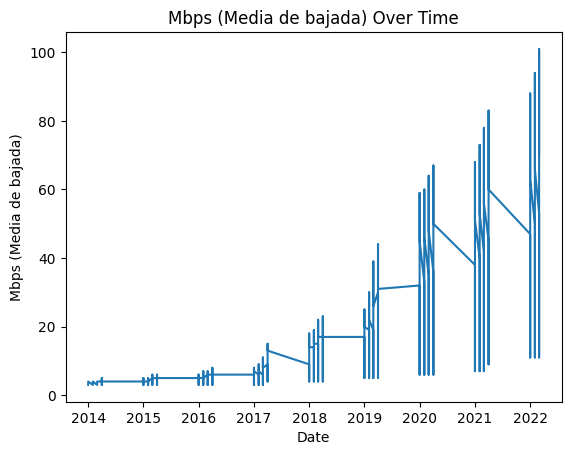

In [35]:
# Create a line plot of a single variable
plt.plot(df_provincia['Date'], df_provincia['Mbps (Media de bajada)'])
plt.xlabel('Date')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Mbps (Media de bajada) Over Time')
plt.show()

C:\Users\juanp\AppData\Local\Temp\ipykernel_28296\2947327886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Date'] = df_year['Date'].dt.strftime(date_format)


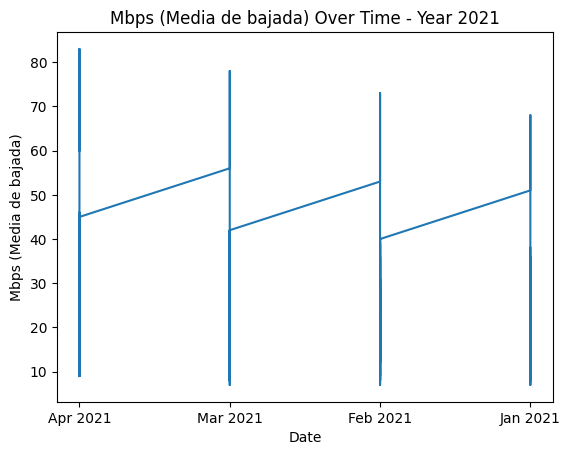

In [36]:
# Filter the data by year
filter_year = 2021
df_year = df_provincia[df_provincia['Date'].dt.year == filter_year]

# Format the date string as "%b %Y"
date_format = '%b %Y'
df_year['Date'] = df_year['Date'].dt.strftime(date_format)

# Create a line plot of the filtered data
plt.plot(df_year['Date'], df_year['Mbps (Media de bajada)'])
plt.xlabel('Date')
plt.ylabel('Mbps (Media de bajada)')
plt.title(f'Mbps (Media de bajada) Over Time - Year {filter_year}')
# plt.xticks(rotation=90)
plt.show()

C:\Users\juanp\AppData\Local\Temp\ipykernel_28296\920131838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_provincia = df_provincia.corr()


<AxesSubplot: >

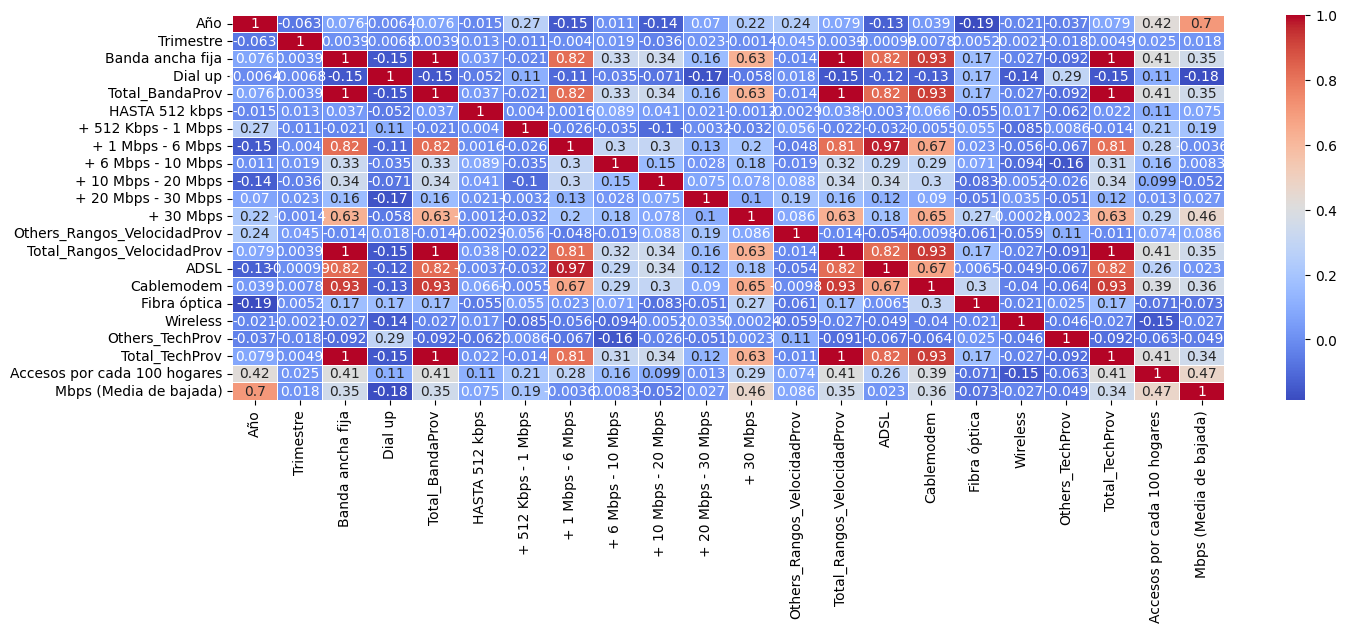

In [37]:
# Create a correlation matrix
corr_provincia = df_provincia.corr()

# Create a heatmap
plt.figure(figsize = (16,5))
sns.heatmap(corr_provincia, cmap='coolwarm', annot=True, linewidths=.5)

C:\Users\juanp\AppData\Local\Temp\ipykernel_28296\1757860640.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_trimestre = df_trimestre.corr()


<AxesSubplot: >

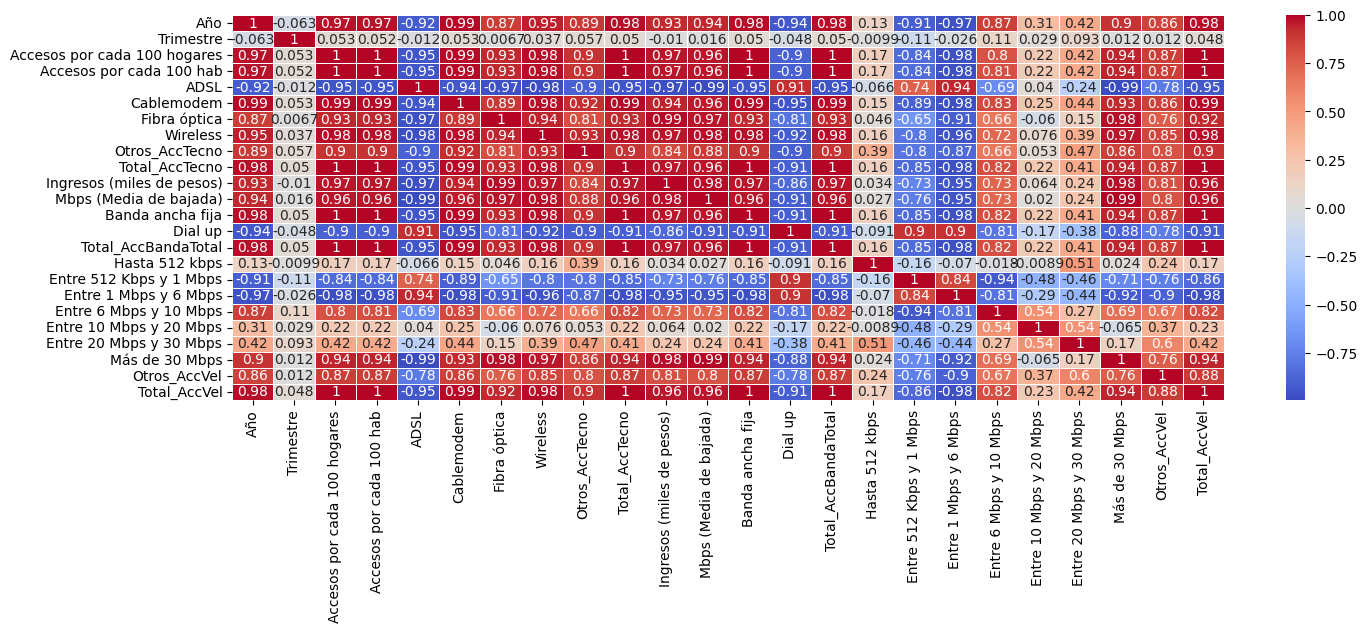

In [38]:
# Create a correlation matrix
corr_trimestre = df_trimestre.corr()

# Create a heatmap
plt.figure(figsize = (16,5))
sns.heatmap(corr_trimestre, cmap='coolwarm', annot=True, linewidths=.5)

- ---------------------------------------------------------------------------------------------------------
# Export Data - Chapter C

It is time to switch to Power BI...

### Exporting the merged DataFrames

In [39]:
# Exporting the "df_provincia" dataframe to a CSV file:
df_provincia.to_csv('df_provincia.csv', index=False)

# Exporting the "df_trimestre" dataframe to a CSV file:
df_trimestre.to_csv('df_trimestre.csv', index=False)

In [40]:
# Test
test = pd.read_csv("df_provincia.csv")
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Banda ancha fija              840 non-null    float64
 4   Dial up                       838 non-null    float64
 5   Total_BandaProv               840 non-null    float64
 6   HASTA 512 kbps                840 non-null    float64
 7   + 512 Kbps - 1 Mbps           840 non-null    float64
 8   + 1 Mbps - 6 Mbps             840 non-null    float64
 9   + 6 Mbps - 10 Mbps            840 non-null    float64
 10  + 10 Mbps - 20 Mbps           840 non-null    float64
 11  + 20 Mbps - 30 Mbps           840 non-null    float64
 12  + 30 Mbps                     840 non-null    float64
 13  Other

In [41]:
test.head(10)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_BandaProv,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,...,Total_Rangos_VelocidadProv,ADSL,Cablemodem,Fibra óptica,Wireless,Others_TechProv,Total_TechProv,Accesos por cada 100 hogares,Mbps (Media de bajada),Date
0,2022,3,Buenos Aires,4715.469,6.199,4721.668,29.985,27.709,290.315,297.915,...,4721.668,339.648,2748.325,1436.433,126.846,70.416,4721.668,78.11,70,2022-03-01
1,2022,3,Buenos Aires,1545.534,2.145,1547.679,517.000,5.742,34.371,67.829,...,1547.679,140.791,1240.125,129.218,5.758,31.787,1547.679,122.28,101,2022-03-01
2,2022,3,Catamarca,70.292,1.000,70.293,71.000,384.000,3.107,5.389,...,70.293,10.010,10.495,46.224,1.329,2.235,70.293,65.33,61,2022-03-01
3,2022,3,Chaco,144.141,5.000,144.146,461.000,987.000,16.782,18.938,...,144.146,27.164,61.800,44.645,8.178,2.359,144.146,43.86,53,2022-03-01
4,2022,3,Chubut,164.874,904.000,165.778,109.000,1.444,45.707,30.940,...,165.778,45.377,72.212,9.574,29.784,8.831,165.778,84.38,16,2022-03-01
5,2022,3,Córdoba,1038.600,68.000,1038.668,99.000,11.312,153.324,111.615,...,1038.668,163.770,465.461,338.570,61.070,9.797,1038.668,88.31,56,2022-03-01
6,2022,3,Corrientes,144.842,4.000,144.846,67.000,3.865,23.427,23.948,...,144.846,36.508,77.140,18.619,7.256,5.323,144.846,48.21,45,2022-03-01
7,2022,3,Entre Ríos,268.937,22.000,268.959,107.000,5.549,47.210,46.855,...,268.959,60.345,132.952,36.971,26.098,12.593,268.959,63.67,42,2022-03-01
8,2022,3,Formosa,68.537,1.000,68.538,97.000,307.000,23.538,19.545,...,68.538,14.470,25.880,11.041,16.935,212.000,68.538,43.76,30,2022-03-01
9,2022,3,Jujuy,118.823,0.000,118.823,58.000,1.879,19.135,15.254,...,118.823,19.257,52.978,40.172,4.033,2.383,118.823,58.91,32,2022-03-01


In [42]:
# Test 2
test_Tri = pd.read_csv("df_trimestre.csv")
test_Tri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
 5   ADSL                          35 non-null     float64
 6   Cablemodem                    35 non-null     float64
 7   Fibra óptica                  35 non-null     float64
 8   Wireless                      35 non-null     float64
 9   Otros_AccTecno                35 non-null     float64
 10  Total_AccTecno                35 non-null     float64
 11  Ingresos (miles de pesos)     35 non-null     float64
 12  Mbps (Media de bajada)        35 non-null     float64
 13  Banda a

In [43]:
test_Tri.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_AccTecno,...,Total_AccBandaTotal,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros_AccVel,Total_AccVel
0,2022,3,76.64,23.95,Jul-Sept 2022,1395.277,6031.970,2871.541,557.110,235.230,...,11091.128,33.013,96.727,1161.370,1151.906,823.505,479.822,6995.750,349.035,11091.128
1,2022,2,75.97,23.72,Abr-Jun 2022,1468.333,5979.214,2723.285,556.243,231.609,...,10958.684,33.667,99.498,1193.090,1197.030,856.562,485.321,6741.922,351.594,10958.684
2,2022,1,73.88,23.05,Ene-Mar 2022,1533.240,6073.426,2219.533,545.814,251.996,...,10624.009,34.890,104.840,1263.273,1209.148,967.508,509.830,6336.187,198.333,10624.009
3,2021,4,73.18,22.81,Oct-Dic 2021,1657.615,5984.240,2072.236,523.107,252.596,...,10489.794,41.262,28.521,1413.208,1245.333,976.539,558.358,6032.322,194.251,10489.794
4,2021,3,70.58,21.98,Jul-Sept 2021,1950.631,5826.257,1566.048,492.415,250.190,...,10085.541,40.174,41.437,2550.229,1095.772,710.122,536.364,4948.174,163.269,10085.541
